In [1]:
import numpy as np
import networkx as nx
import seaborn as sns
import csaps

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Avenir"
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
def approximate(s = 0, mu = 1e-4, amp = 1, lamb = 1, N = 100):

    idx = np.arange(0, N + 1)
    d = (2 + amp * s) * (N - idx) + mu / lamb * idx * (1 + amp * s)
    a = (N - idx) / d
    b = (N - idx) * (1 - mu / lamb) * (1 + amp * s) / d
    c = N * mu / lamb * (1 + amp * s) / d

    alpha = np.zeros(N)
    beta = np.zeros(N)
    alpha[N - 1] = a[N - 1]
    beta[N - 1] = b[N - 1] + c[N - 1]
    for i in idx[1:-2][::-1]:
        beta[i] = (b[i] * beta[i + 1] + c[i]) / (1 - b[i] * alpha[i + 1])
        alpha[i] = a[i] / (1 - b[i] * alpha[i + 1])
        
    return beta[1]


def approximate_t(s = 0, mu = 1e-4, amp = 1, lamb = 1):
    N = 100
    idx = np.arange(1, N) 
    W = (N + idx * s)
    P1 = np.eye(N + 2) 
    P1[idx, idx - 1] = lamb * 1 / W * idx * (1 - idx / N) 
    P1[idx, idx + 1] = lamb * (1 + amp * s) / W * idx * (1 - idx / N) 
    P1[idx, idx] -=  (P1[idx, idx - 1] + P1[idx, idx + 1])
    P1[idx, idx] -= mu * (1 + s) / W * idx  * idx / N 
    P1[idx, idx + 1] -= mu * (1 + s) / W * idx * (1 - idx / N) 
    P1[idx, N + 1] += mu * (1 + s) / W * idx 
    P1[N, N] -= mu
    P1[N, N + 1] += mu 
    
    F = np.linalg.inv(np.eye(N) - P1[1:N + 1, 1:N + 1]) 
    pfix = F @ P1[1:-1, [0,-1]]
    
    return F[0] @ pfix[:,1] / pfix[0,1]

def process(key, N = 100):
    path = ""
    #N = 100
    data_bd = np.zeros((1 * N,4))
    raw_bd = np.loadtxt(path + key + '_results_bd.txt')
    
    data_bd[:,0] = raw_bd[:,0]
    data_bd[:,1] = raw_bd[:,1]
    data_bd[:,2] = raw_bd[:,3] / (raw_bd[:,2] + raw_bd[:,3])
    data_bd[:,3] = raw_bd[:,5]
    data_bd[:,3][np.where(data_bd[:,3] == 0)] = np.nan    
    
    data_db = np.zeros((1 * N,4))
    raw_db = np.loadtxt(path + key + '_results_db.txt')

    data_db[:,0] = raw_db[:,0]
    data_db[:,1] = raw_db[:,1]
    data_db[:,2] = raw_db[:,3] / (raw_db[:,2] + raw_db[:,3])
    data_db[:,3] = raw_db[:,5]
    data_db[:,3][np.where(data_db[:,3] == 0)] = np.nan 
    
    print("done")
    return data_bd, data_db


def process_single(key, N = 100, approx = False):
    path = ""
    data_bd = np.zeros((N,3))
    raw_bd = np.loadtxt(path + key + '_results_bd.txt')

    data_bd[:,0] = raw_bd[:,0]
    data_bd[:,1] = raw_bd[:,2] / (raw_bd[:,1] + raw_bd[:,2])
    data_bd[:,2] = raw_bd[:,4] #/ raw_bd[:,2]
    data_bd[:,2][np.where(data_bd[:,2] == 0)] = np.nan    
    data_db = np.zeros((N,3))
    raw_db = np.loadtxt(path + key + '_results_db.txt')

    data_db[:,0] = raw_db[:,0]
    data_db[:,1] = raw_db[:,2] / (raw_db[:,1] + raw_db[:,2])
    data_db[:,2] = raw_db[:,4] #/ raw_db[:,2]
    data_db[:,2][np.where(data_db[:,2] == 0)] = np.nan 
    
    print("done")
    return data_bd, data_db


def single(s, N = 100, amp = 1):
    return (1 - (1+s)**(-amp)) / (1 - (1+s)**(-N*amp))

def color_line(x, y, value, axs):
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)


    norm = plt.Normalize(0, 1)
    lc = LineCollection(segments, cmap='RdYlBu', norm=norm)
    lc.set_array(value)
    lc.set_linewidth(5)
    line = axs.add_collection(lc)

# Figure 2

done
done
done
done
done
done
done
done


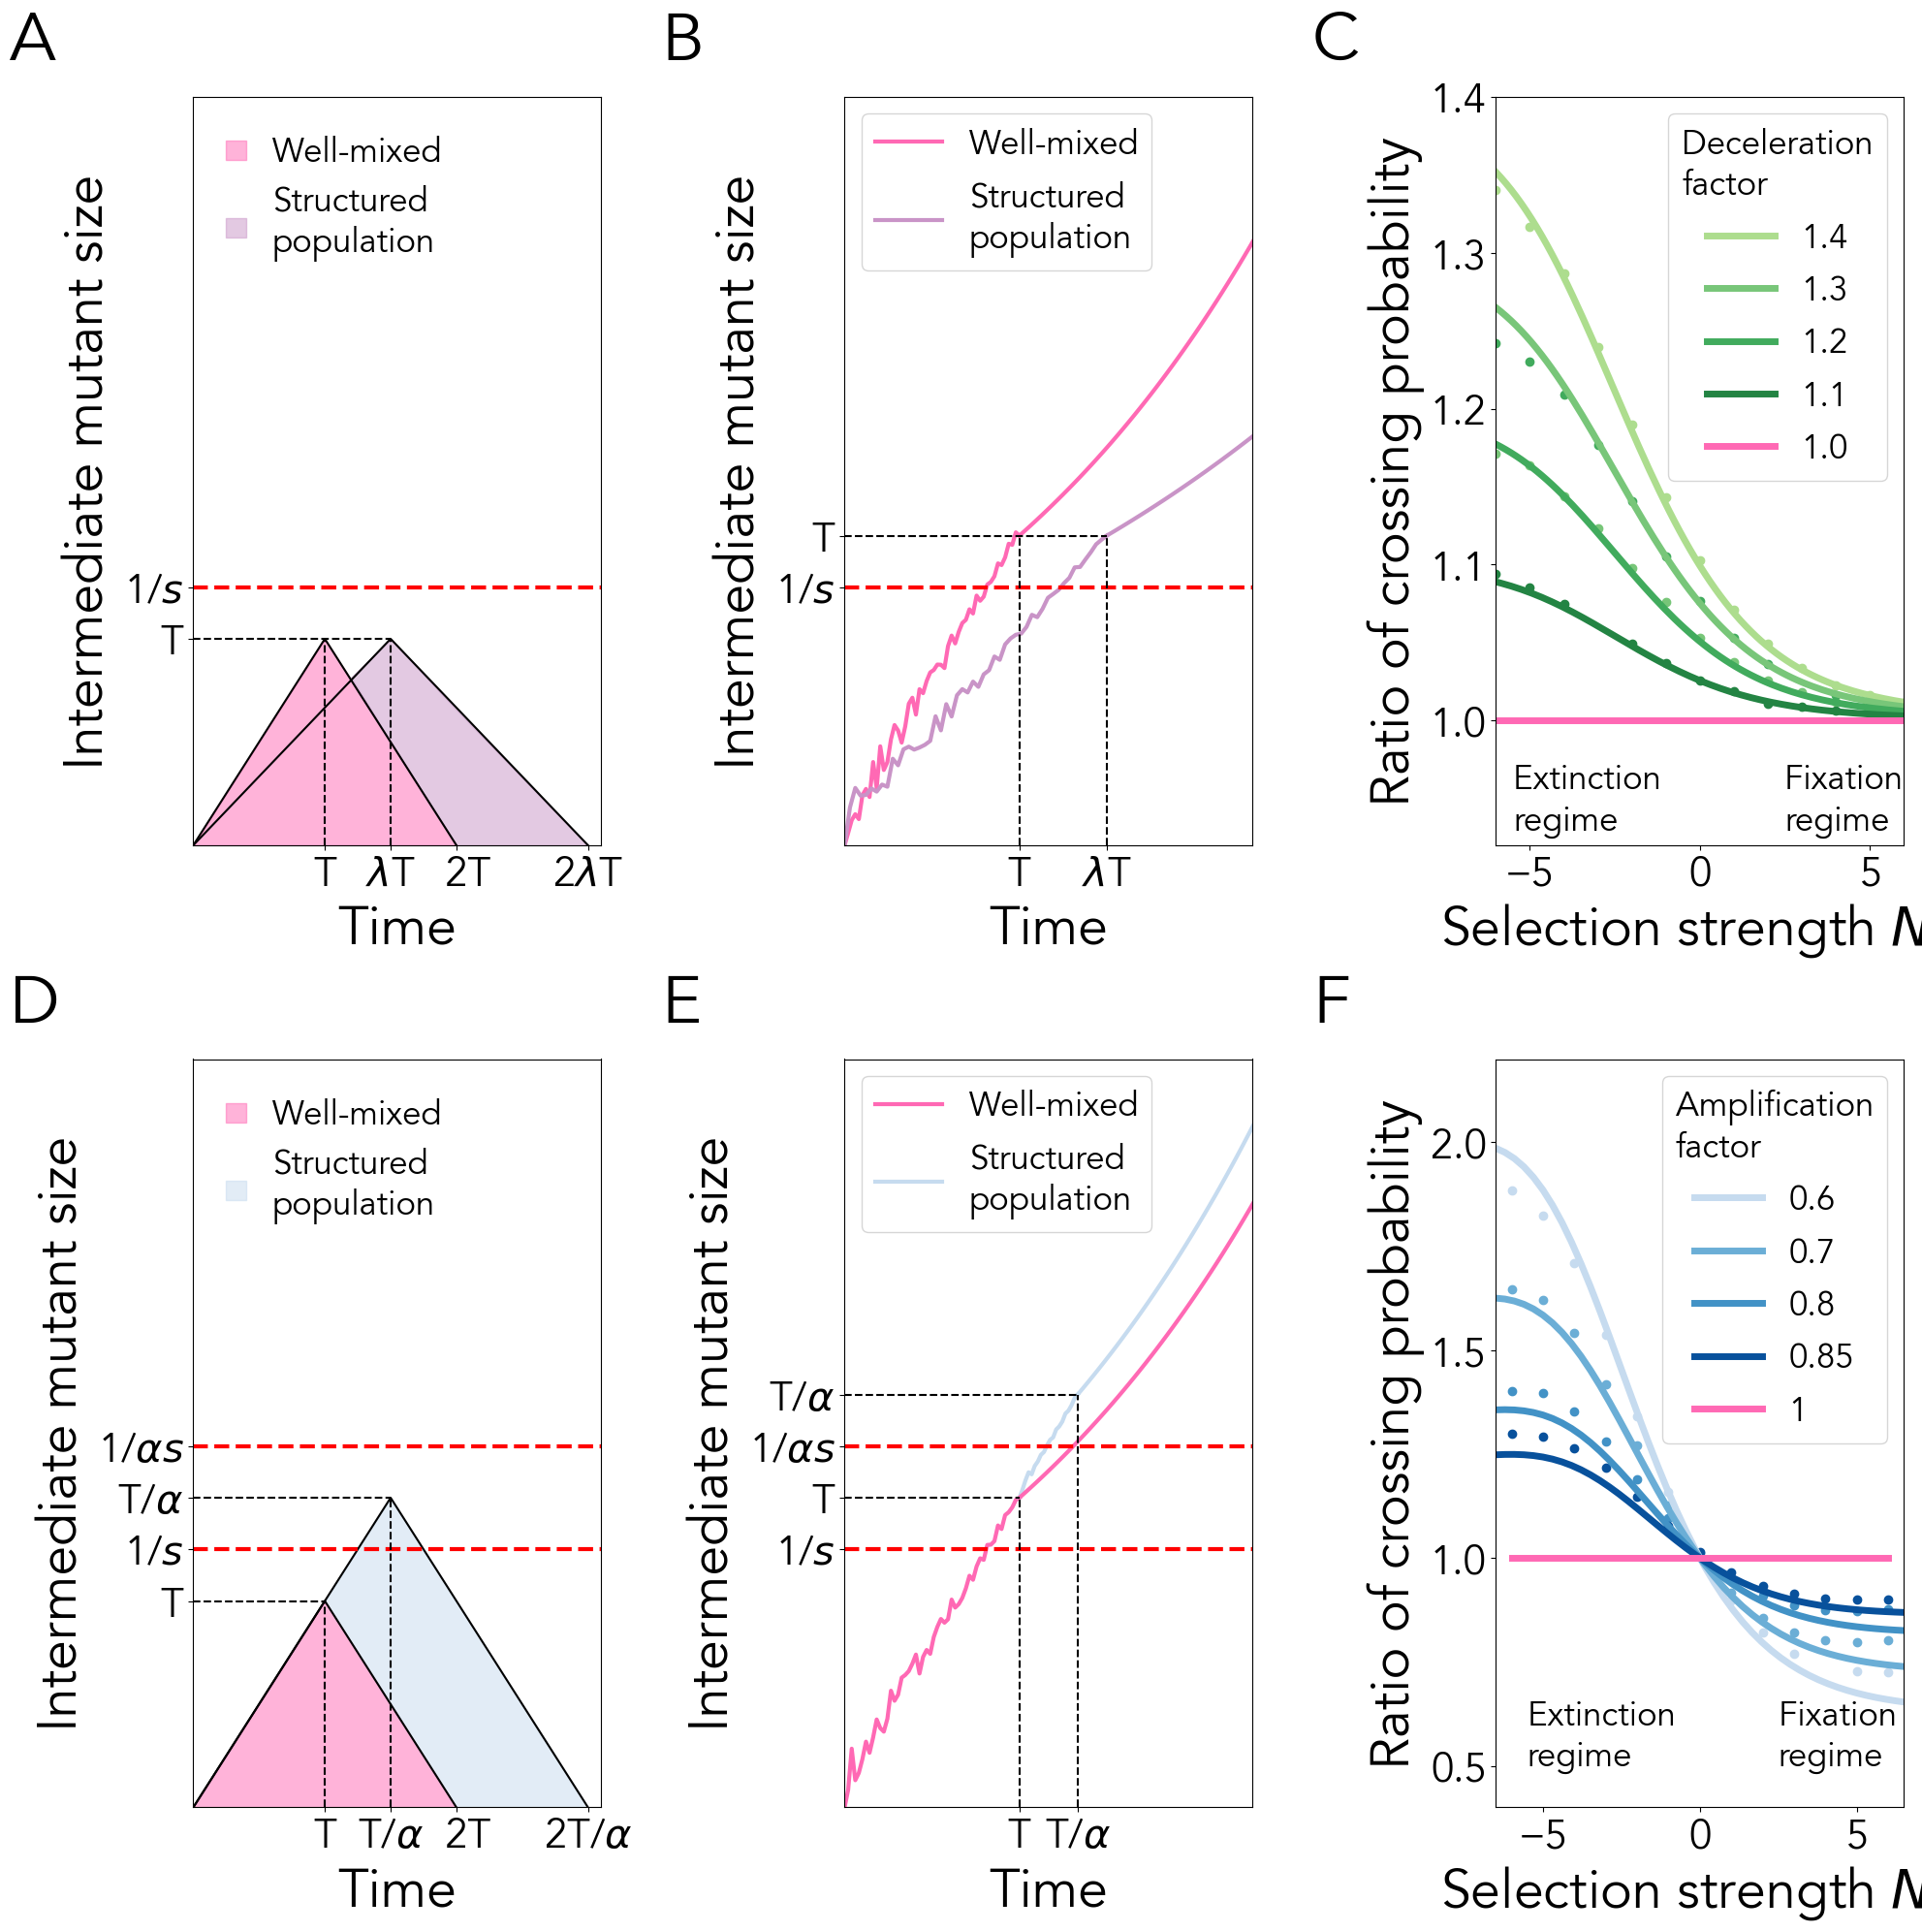

In [4]:
plt.figure(figsize = (20,20))
ax = plt.subplot(231)
plt.plot([0,1,2],[0,0.8,0], c = 'k')
plt.fill_between([0,1,2],[0,0.8,0], 0, color = '#ff69b4', alpha = 0.5)
plt.fill_between([1.2,1.5,2,3],[0.65, 0.8, 0.525, 0], [0.65,0.4,0,0], 
                 color = '#c994c7', alpha = 0.5)


plt.plot([0,1.5,3],[0,0.8,0], c = 'k')

plt.plot([0,1.5],[0.8, 0.8], linestyle = '--', c = 'k')
plt.plot([0,3.5],[1, 1], linestyle = '--', c = 'r', linewidth = 3)

plt.plot([1,1],[0, 0.8], linestyle = '--', c = 'k')
plt.plot([1.5,1.5],[0, 0.8], linestyle = '--', c = 'k')

plt.xticks([1, 1.5, 2, 3], ['T', '$\lambda$T', '  2T', '2$\lambda$T'], fontsize = 30)
plt.yticks([0.8, 1], ['T', '1/$s$'], fontsize = 30)

plt.fill_between([0.25,0.4], 2.655, 2.73, color = '#ff69b4', alpha = 0.5)
plt.text(0.6, 2.65, 'Well-mixed', c = 'k', fontsize = 25)
plt.fill_between([0.25,0.4], 2.355, 2.43, color = '#c994c7', alpha = 0.5)
plt.text(0.6, 2.3, 'Structured\npopulation', c = 'k', fontsize = 25)


plt.xlim(0, 3.1)
plt.ylim(0, 2.9)

plt.xlabel('Time', fontsize = 40)
plt.ylabel('Intermediate mutant size', fontsize = 40)
plt.text(-0.45, 1.05, 'A', fontsize = 50, transform=ax.transAxes)

##########################################################################
ax = plt.subplot(232)
x = np.linspace(0,1.5,50)
y = np.linspace(0,1.2,50)
y[1:-1] += (0.2 * np.random.rand(50) / np.exp(x))[1:-1]
plt.plot(x, y, c = '#ff69b4', linewidth = 3)

x = np.linspace(0,2.25,50)
y = np.linspace(0,1.2,50)
y[1:-1] += (0.2 * np.random.rand(50) / np.exp(x))[1:-1]
plt.plot(x, y, c = '#c994c7', linewidth = 3)

x = np.linspace(0, np.log(10))
plt.plot(x + 1.5, 1.2 * np.exp(x / 3), c = '#ff69b4', linewidth = 3)

x = np.linspace(0, np.log(10) * 1.5)
plt.plot(x + 2.25, 1.2 * np.exp(x / 1.5 / 3), c = '#c994c7', linewidth = 3)


plt.plot([0,3.5],[1, 1], linestyle = '--', c = 'r', linewidth = 3)

plt.plot([1.5,1.5],[0, 1.2], linestyle = '--', c = 'k')
plt.plot([2.25,2.25],[0, 1.2], linestyle = '--', c = 'k')
plt.plot([0,2.25],[1.2, 1.2], linestyle = '--', c = 'k')

plt.xticks([1.5, 2.25], ['T', '$\lambda$T'], fontsize = 30)
plt.yticks([1,1.2], ['1/$s$', 'T'], fontsize = 30)

plt.xlim(0, 3.5)
plt.ylim(0, 2.9)

plt.xlabel('Time', fontsize = 40)
plt.ylabel('Intermediate mutant size', fontsize = 40)

plt.legend(['Well-mixed', 'Structured\npopulation'], fontsize = 25, loc = 'upper left')

plt.text(-0.45, 1.05, 'B', fontsize = 50, transform=ax.transAxes)
##########################################################################

c = ['#addd8e', '#78c679', '#41ab5d', '#238443']#[::-1]
sns.set_palette(c)
ax = plt.subplot(233)
s = np.linspace(-0.15,0.15, 201)

N = 100
mu = 1e-4
y1 = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1/1.4) for s in s])
y2 = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1/1.3) for s in s])
y3 = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1/1.2) for s in s])
y4 = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1/1.1) for s in s])

z = np.array([approximate(s = s, N = N,mu=mu) for s in s])

plt.plot(N * s, (y1/z), linewidth = 5)
plt.plot(N * s, (y2/z), linewidth = 5)
plt.plot(N * s, (y3/z), linewidth = 5)
plt.plot(N * s, (y4/z), linewidth = 5)

plt.plot([-6,6], 2 * [1], linewidth = 5, c = '#ff69b4')


ls =  np.arange(-0.2,0.21,0.01)
norm = np.array([approximate(s = s, mu = mu, N = N) for s in ls]) 

data_bd, data_db = process('fig2_data/tunnel/reg982', N = 41)
plt.scatter(N * data_bd[:,0], data_bd[:,2] / norm)

data_bd, data_db = process('fig2_data/tunnel/reg1067', N = 41)
plt.scatter(N * data_bd[:,0], data_bd[:,2] / norm)

data_bd, data_db = process('fig2_data/tunnel/reg1014', N = 41)
plt.scatter(N * data_bd[:,0], data_bd[:,2] / norm)

data_bd, data_db = process('fig2_data/tunnel/reg1088', N = 41)
plt.scatter(N * data_bd[:,0], data_bd[:,2] / norm)

plt.xticks([-5, 0, 5], fontsize = 30)
plt.yticks(fontsize = 30)

plt.xlabel('Selection strength $Ns$', fontsize = 40)
plt.ylabel('Ratio of crossing probability', fontsize = 40)

plt.xlim(-6,6)
plt.ylim(0.92,1.4)

plt.text(-5.5, 0.93, 'Extinction \nregime', fontsize = 25)
plt.text(2.5, 0.93, 'Fixation \nregime', fontsize = 25)

plt.legend([1.4, 1.3, 1.2, 1.1, 1.0], title = 'Deceleration\nfactor', title_fontsize = 25, 
           fontsize = 25, loc = 'upper right')
plt.text(-0.45, 1.05, 'C', fontsize = 50, transform=ax.transAxes)

##########################################################################
ax = plt.subplot(234)
plt.plot([0,1,2],[0,0.8,0], c = 'k')
plt.fill_between([0,1,2],[0,0.8,0], 0, color = '#ff69b4', alpha = 0.5)

plt.plot([0,1.5,3],[0,0.8 * 1.5,0], c = 'k')
plt.fill_between([1,1.5,2,3],[0.8, 1.2, 0.8, 0], [0.8,0.4,0,0], 
                 color = '#c6dbef', alpha = 0.5)
#plt.plot([0,1,2],[0,1.1,0], c = 'k')

plt.plot([0,3.5],[1.4, 1.4], linestyle = '--', c = 'r', linewidth = 3)
plt.plot([0,1],[0.8, 0.8], linestyle = '--', c = 'k')
plt.plot([0,3.5],[1, 1], linestyle = '--', c = 'r', linewidth = 3)
plt.plot([0,1.5],[1.2, 1.2], linestyle = '--', c = 'k')

plt.plot([1.5,1.5],[0, 1.2], linestyle = '--', c = 'k')
plt.plot([1,1],[0, 0.8], linestyle = '--', c = 'k')

plt.xticks([1, 1.5, 2, 3], ['T', 'T/$\\alpha$', '  2T', '2T/$\\alpha$'], fontsize = 30)
plt.yticks([0.8, 1, 1.2, 1.4], ['T', '1/$s$', 'T/$\\alpha$','1/$\\alpha s$'], fontsize = 30)

plt.fill_between([0.25,0.4], 2.655, 2.73, color = '#ff69b4', alpha = 0.5)
plt.text(0.6, 2.65, 'Well-mixed', c = 'k', fontsize = 25)
plt.fill_between([0.25,0.4], 2.355, 2.43, color = '#c6dbef', alpha = 0.5)
plt.text(0.6, 2.3, 'Structured\npopulation', c = 'k', fontsize = 25)

plt.xlim(0, 3.1)
plt.ylim(0, 2.9)

plt.xlabel('Time', fontsize = 40)
plt.ylabel('Intermediate mutant size', fontsize = 40)
plt.text(-0.45, 1.05, 'D', fontsize = 50, transform=ax.transAxes)

##########################################################################
ax = plt.subplot(235)
x = np.linspace(0,1.5,50)
y = np.linspace(0,1.2,50)
y[1:-1] += (0.2 * np.random.rand(50) / np.exp(x))[1:-1]
plt.plot(x,y, c = '#ff69b4', linewidth = 3)

x = np.linspace(1.5,2., 20)
y = np.linspace(1.2,1.6, 20)
y[1:-1] += (0.2 * np.random.rand(20) / np.exp(4 * (x - 1.2)))[1:-1]
plt.plot(x,y, c = '#c6dbef', linewidth = 3)

x = np.linspace(0, np.log(10))
plt.plot(x + 1.5, 1.2 * np.exp(x / 3), c = '#ff69b4', linewidth = 3)

x = np.linspace(0, np.log(10))
plt.plot(x + 2., 1.6 * np.exp(x / 3), c = '#c6dbef', linewidth = 3)

plt.plot([0,3.5],[1.4, 1.4], linestyle = '--', c = 'r', linewidth = 3)
plt.plot([0,3.5],[1, 1], linestyle = '--', c = 'r', linewidth = 3)

plt.plot([1.5,1.5], [0, 1.2], linestyle = '--', c = 'k')
plt.plot([2.,2.], [0, 1.6], linestyle = '--', c = 'k')

plt.plot([0, 1.5], [1.2,1.2], linestyle = '--', c = 'k')
plt.plot([0, 2.], [1.6,1.6], linestyle = '--', c = 'k')

plt.xticks([1.5, 2.], ['T', 'T/$\\alpha$', ], fontsize = 30)
plt.yticks([1, 1.2, 1.4, 1.6], ['1/$s$', 'T','1/$\\alpha s$', 'T/$\\alpha$'], fontsize = 30)
plt.ylabel('Intermediate mutant size', fontsize = 40)
plt.xlabel('Time', fontsize = 40)

plt.xlim(0, 3.5)
plt.ylim(0, 2.9)
plt.legend(['Well-mixed', 'Structured\npopulation'], fontsize = 25, loc = 'upper left')

plt.text(-0.45, 1.05, 'E', fontsize = 50, transform=ax.transAxes)
##########################################################
c = ['#c6dbef', '#6baed6', '#4292c6', '#08519c']
sns.set_palette(c)
ax = plt.subplot(236)

N = 100
mu = 1e-4
ls = np.linspace(-0.15,0.15, 100)

y1 = np.array([approximate(s = s, N = N, mu = mu, amp = 0.6, lamb = 1) 
              for s in ls]) 
y2 = np.array([approximate(s = s, N = N, mu = mu, amp = 0.7, lamb = 1) 
              for s in ls]) 
y3 = np.array([approximate(s = s, N = N, mu = mu, amp = 0.8, lamb = 1) 
              for s in ls]) 
y4 = np.array([approximate(s = s, N = N, mu = mu, amp = 0.85, lamb = 1) 
              for s in ls]) 

z = np.array([approximate(s = s, mu = mu, N = N) for s in ls])

plt.plot(N * ls, (y1/z), linewidth = 5)

plt.plot(N * ls, (y2/z), linewidth = 5)

plt.plot(N * ls, (y3/z), linewidth = 5)

plt.plot(N * ls, (y4/z), linewidth = 5)

plt.plot([-6,6], 2 * [1], linewidth = 5, c = '#ff69b4')

ls =  np.arange(-0.2,0.21,0.01)
norm = np.array([approximate(s = s, mu = mu, N = N) for s in ls]) 

data_bd, data_db = process('fig2_data/tunnel/st403', N = 41)
plt.scatter(N * data_bd[:,0], data_bd[:,2] / norm)

data_bd, data_db = process('fig2_data/tunnel/st967', N = 41)
plt.scatter(N * data_bd[:,0], data_bd[:,2] / norm)

data_bd, data_db = process('fig2_data/tunnel/st1568', N = 41)
plt.scatter(N * data_bd[:,0], data_bd[:,2] / norm)

data_bd, data_db = process('fig2_data/tunnel/st1308', N = 41)
plt.scatter(N * data_bd[:,0], data_bd[:,2] / norm)


plt.legend([.6,  0.7, 0.8, 0.85, 1], title = 'Amplification\nfactor', 
           title_fontsize = 25, fontsize = 25, loc = 'upper right')


plt.text(-5.5, 0.5,'Extinction \nregime', fontsize = 25)
plt.text(2.5, 0.5,'Fixation \nregime', fontsize = 25)

plt.xticks([-5, 0, 5],fontsize = 30)
plt.yticks([.5,1,1.5,2], fontsize = 30)

plt.xlabel('Selection strength $Ns$', fontsize = 40)
plt.ylabel('Ratio of crossing probability', fontsize = 40)

plt.xlim(-6.5,6.5)
plt.ylim(0.4,2.2)
plt.text(-0.45, 1.05, 'F', fontsize = 50, transform=ax.transAxes)

plt.tight_layout()


#plt.savefig('3intuition.pdf', bbox_inches='tight', pad_inches=1)

# Figure 3

done
done
done
done
done


/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_61814/603668609.py:86: RuntimeWarning: invalid value encountered in divide
  return (1 - (1+s)**(-amp)) / (1 - (1+s)**(-N*amp))


done


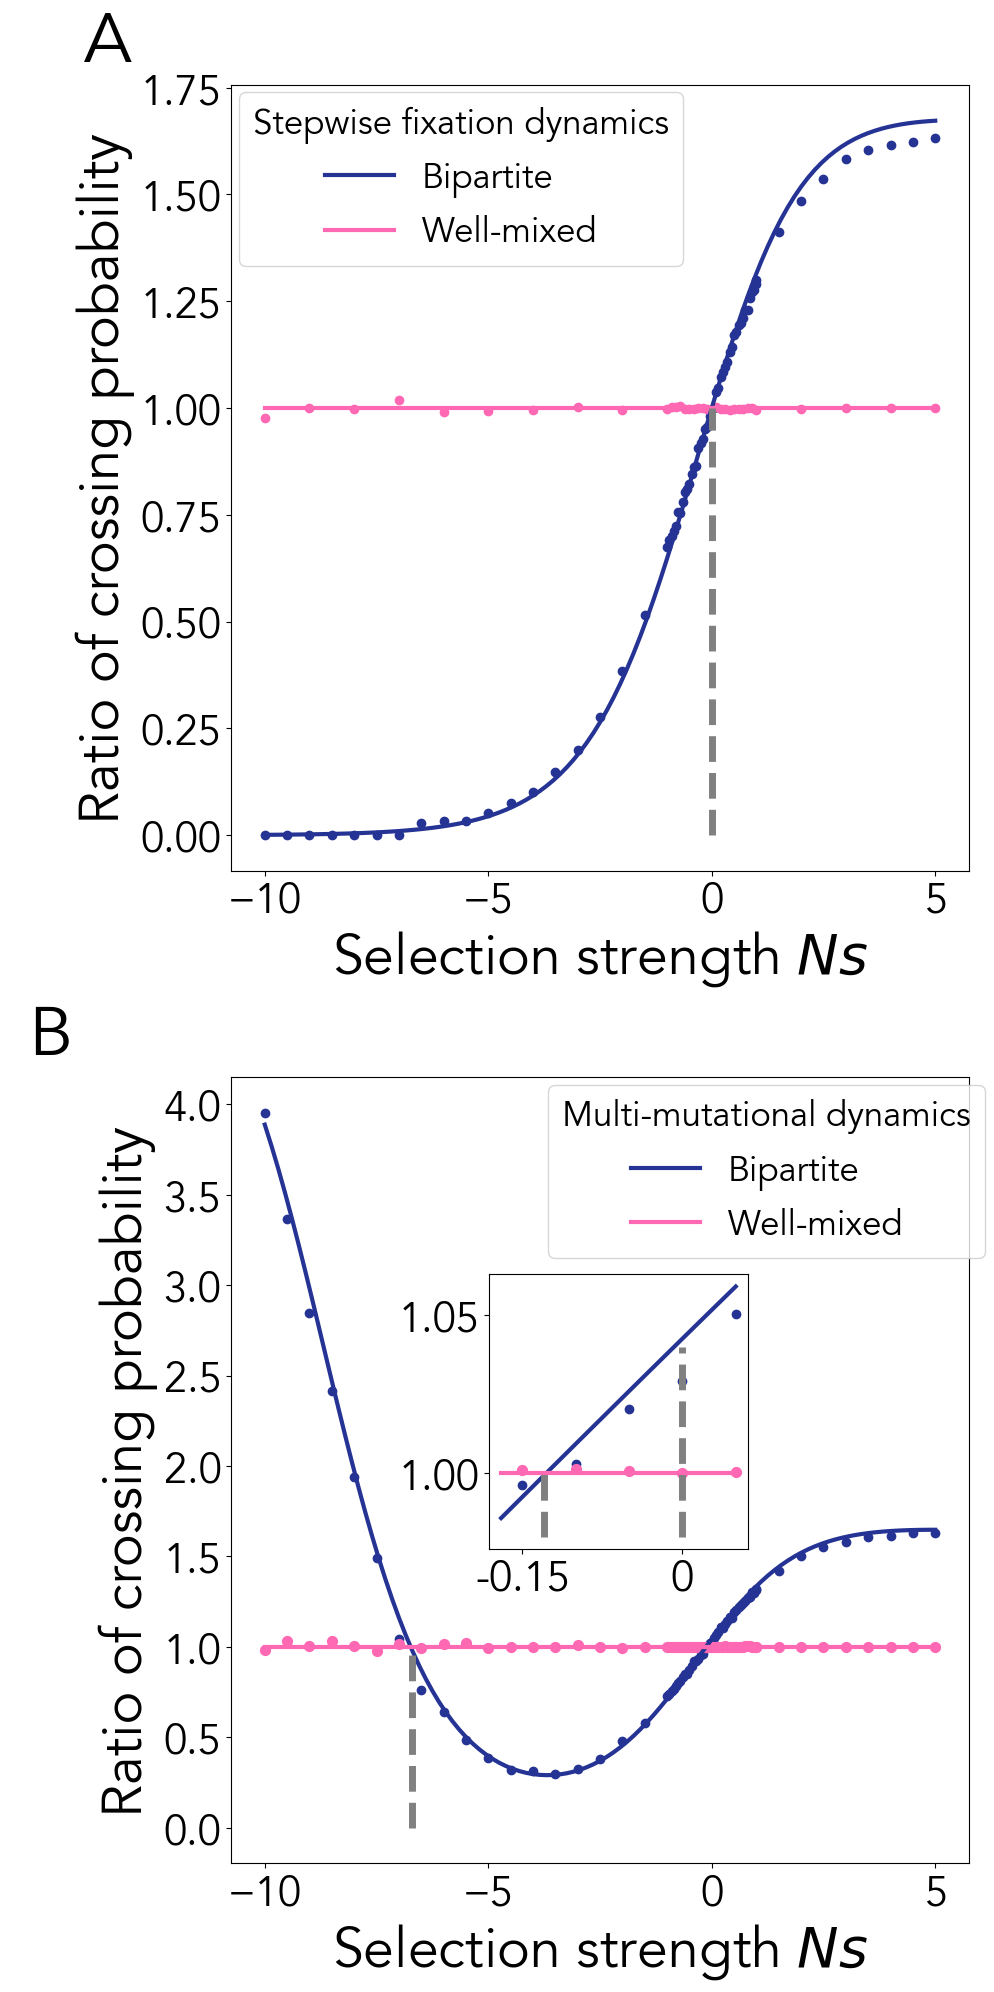

In [3]:
plt.figure(figsize = (10,20))
ax = plt.subplot(211)
ls = np.linspace(-0.1, 0.05,101)
N = 100

data_bd, data_db = process_single('fig3_data/single/bi408', N = 88)
data_bd = data_bd[5:-15]
wm = single(data_bd[:,0], amp = 1, N = N)
plt.scatter(N * data_bd[:,0], data_bd[:,1] / wm, c = '#253494')
wm = single(ls, amp = 1, N = N)
plt.plot(N * ls, single(ls, amp = 1.71434, N = N) / wm, linewidth = 3, c = '#253494', label = 'Bipartite')

data_bd, data_db = process_single('fig3_data/single/wm', N = 47)
data_bd = data_bd[5:-8]
wm = single(data_bd[:,0], amp = 1, N = N)
plt.scatter(N * data_bd[:,0], data_bd[:,1] / wm, c = '#ff69b4')
wm = single(ls, amp = 1, N = N)
plt.plot(N * ls, single(ls, N = N) / wm, linewidth = 3, c = '#ff69b4', label = 'Well-mixed')

plt.plot(2 * [0], [0,1], c = 'grey', linewidth = 5, linestyle = "--")

plt.xticks([-10,-5,0,5], fontsize = 30)
plt.yticks(fontsize = 30)

plt.xlabel('Selection strength $Ns$', fontsize = 40)
plt.ylabel('Ratio of crossing probability', fontsize = 40)

plt.legend(title = 'Stepwise fixation dynamics', title_fontsize=25, loc = (0.01,0.77), fontsize = 25)


plt.text(-0.2, 1.03, 'A', fontsize = 50, transform=ax.transAxes)

#####################################################################################
ax = plt.subplot(212)
ls = np.linspace(-0.1, 0.05, 101)
N = 100
mu = 1e-6

data_bd, data_db = process('fig3_data/tunnel/bi408', N = 88)
data_bd = data_bd[5:-15]
wm = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1) 
              for s in data_bd[:,0]]) 
plt.scatter(N * data_bd[:,0], data_bd[:,2] / wm, c = '#253494')

wm = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1) for s in ls])
y = np.array([approximate(s = s, N = N, mu = mu, amp = 1.71434, lamb = 0.101161) 
              for s in ls]) 
plt.plot(N * ls, y/wm, linewidth = 3, c = '#253494', label = 'Bipartite')

wm_c = np.array([approximate(s = s, mu = mu, N = N) for s in ls]) 
data_bd, data_db = process('fig3_data/tunnel/wm', N = 88)
data_bd = data_bd [5:-15]
wm = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1) 
              for s in data_bd[:,0]]) 
plt.scatter(N * data_bd[:,0], data_bd[:,2] / wm, s = 50, c = '#ff69b4')
wm = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1) for s in ls])
plt.plot(N * ls, wm_c / wm, linewidth = 3, c = '#ff69b4', label = 'Well-mixed')

plt.plot(2 * [-6.7], [0, 1], c = 'grey', linewidth = 5, linestyle = "--")

plt.xlabel('Selection strength $Ns$', fontsize = 40)
plt.ylabel('Ratio of crossing probability', fontsize = 40)

plt.xticks([-10,-5,0,5], fontsize = 30)
plt.yticks(fontsize = 30)

leg = plt.legend(title = 'Multi-mutational dynamics', title_fontsize=25, 
                 loc = (0.43, 0.77), fontsize = 25)

plt.text(-0.3, 1.03, ' B', fontsize = 50, transform=ax.transAxes)

#####################################################################################

ins = ax.inset_axes([0.35,0.4,0.35,0.35])

ls = np.linspace(-0.0017, 0.0005, 100)

data_bd, data_db = process('fig3_data/tunnel/bi408', N = 88)
data_bd = data_bd[40:45]
wm = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1) 
              for s in data_bd[:,0]]) 
ins.scatter(N * data_bd[:,0], data_bd[:,2] / wm, c = '#253494')
y = np.array([approximate(s = s, N = N, mu = mu, amp = 1.71434, lamb = 0.101161) 
              for s in ls]) 
wm = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1) 
              for s in ls]) 
ins.plot(N * ls, y / wm, linewidth = 3, c = '#253494')

data_bd, data_db = process('fig3_data/tunnel/wm', N = 88)
data_bd = data_bd[40:45]
wm = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1) 
              for s in data_bd[:,0]]) 
ins.scatter(N * data_bd[:,0], data_bd[:,2] / wm, s = 50, c = '#ff69b4')

wm_c = np.array([approximate(s = s, mu = mu, N = N) for s in ls]) 
wm = np.array([approximate(s = s, N = N, mu = mu, amp = 1, lamb = 1) 
              for s in ls]) 
ins.plot(N * ls, wm_c / wm, linewidth = 3, c = '#ff69b4')


ins.plot(2 * [0], [0.98, 1.04], c = 'grey', linewidth = 5, linestyle = "--")

ins.plot(2 * [-0.13], [.98, 1], c = 'grey', linewidth = 5, linestyle = "--")

ins.set_xticks([-0.15, 0], ['-0.15', '0'])
ins.set_yticks([1, 1.05])
ins.tick_params(labelsize=30)

plt.tight_layout()
#plt.savefig('Figure2_ratio_version.pdf', bbox_inches='tight', pad_inches=0.1)
plt.show()

/var/folders/dn/kt6f6_td4dl2qrsg4wnv22z80000gn/T/ipykernel_61814/4002341077.py:221: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


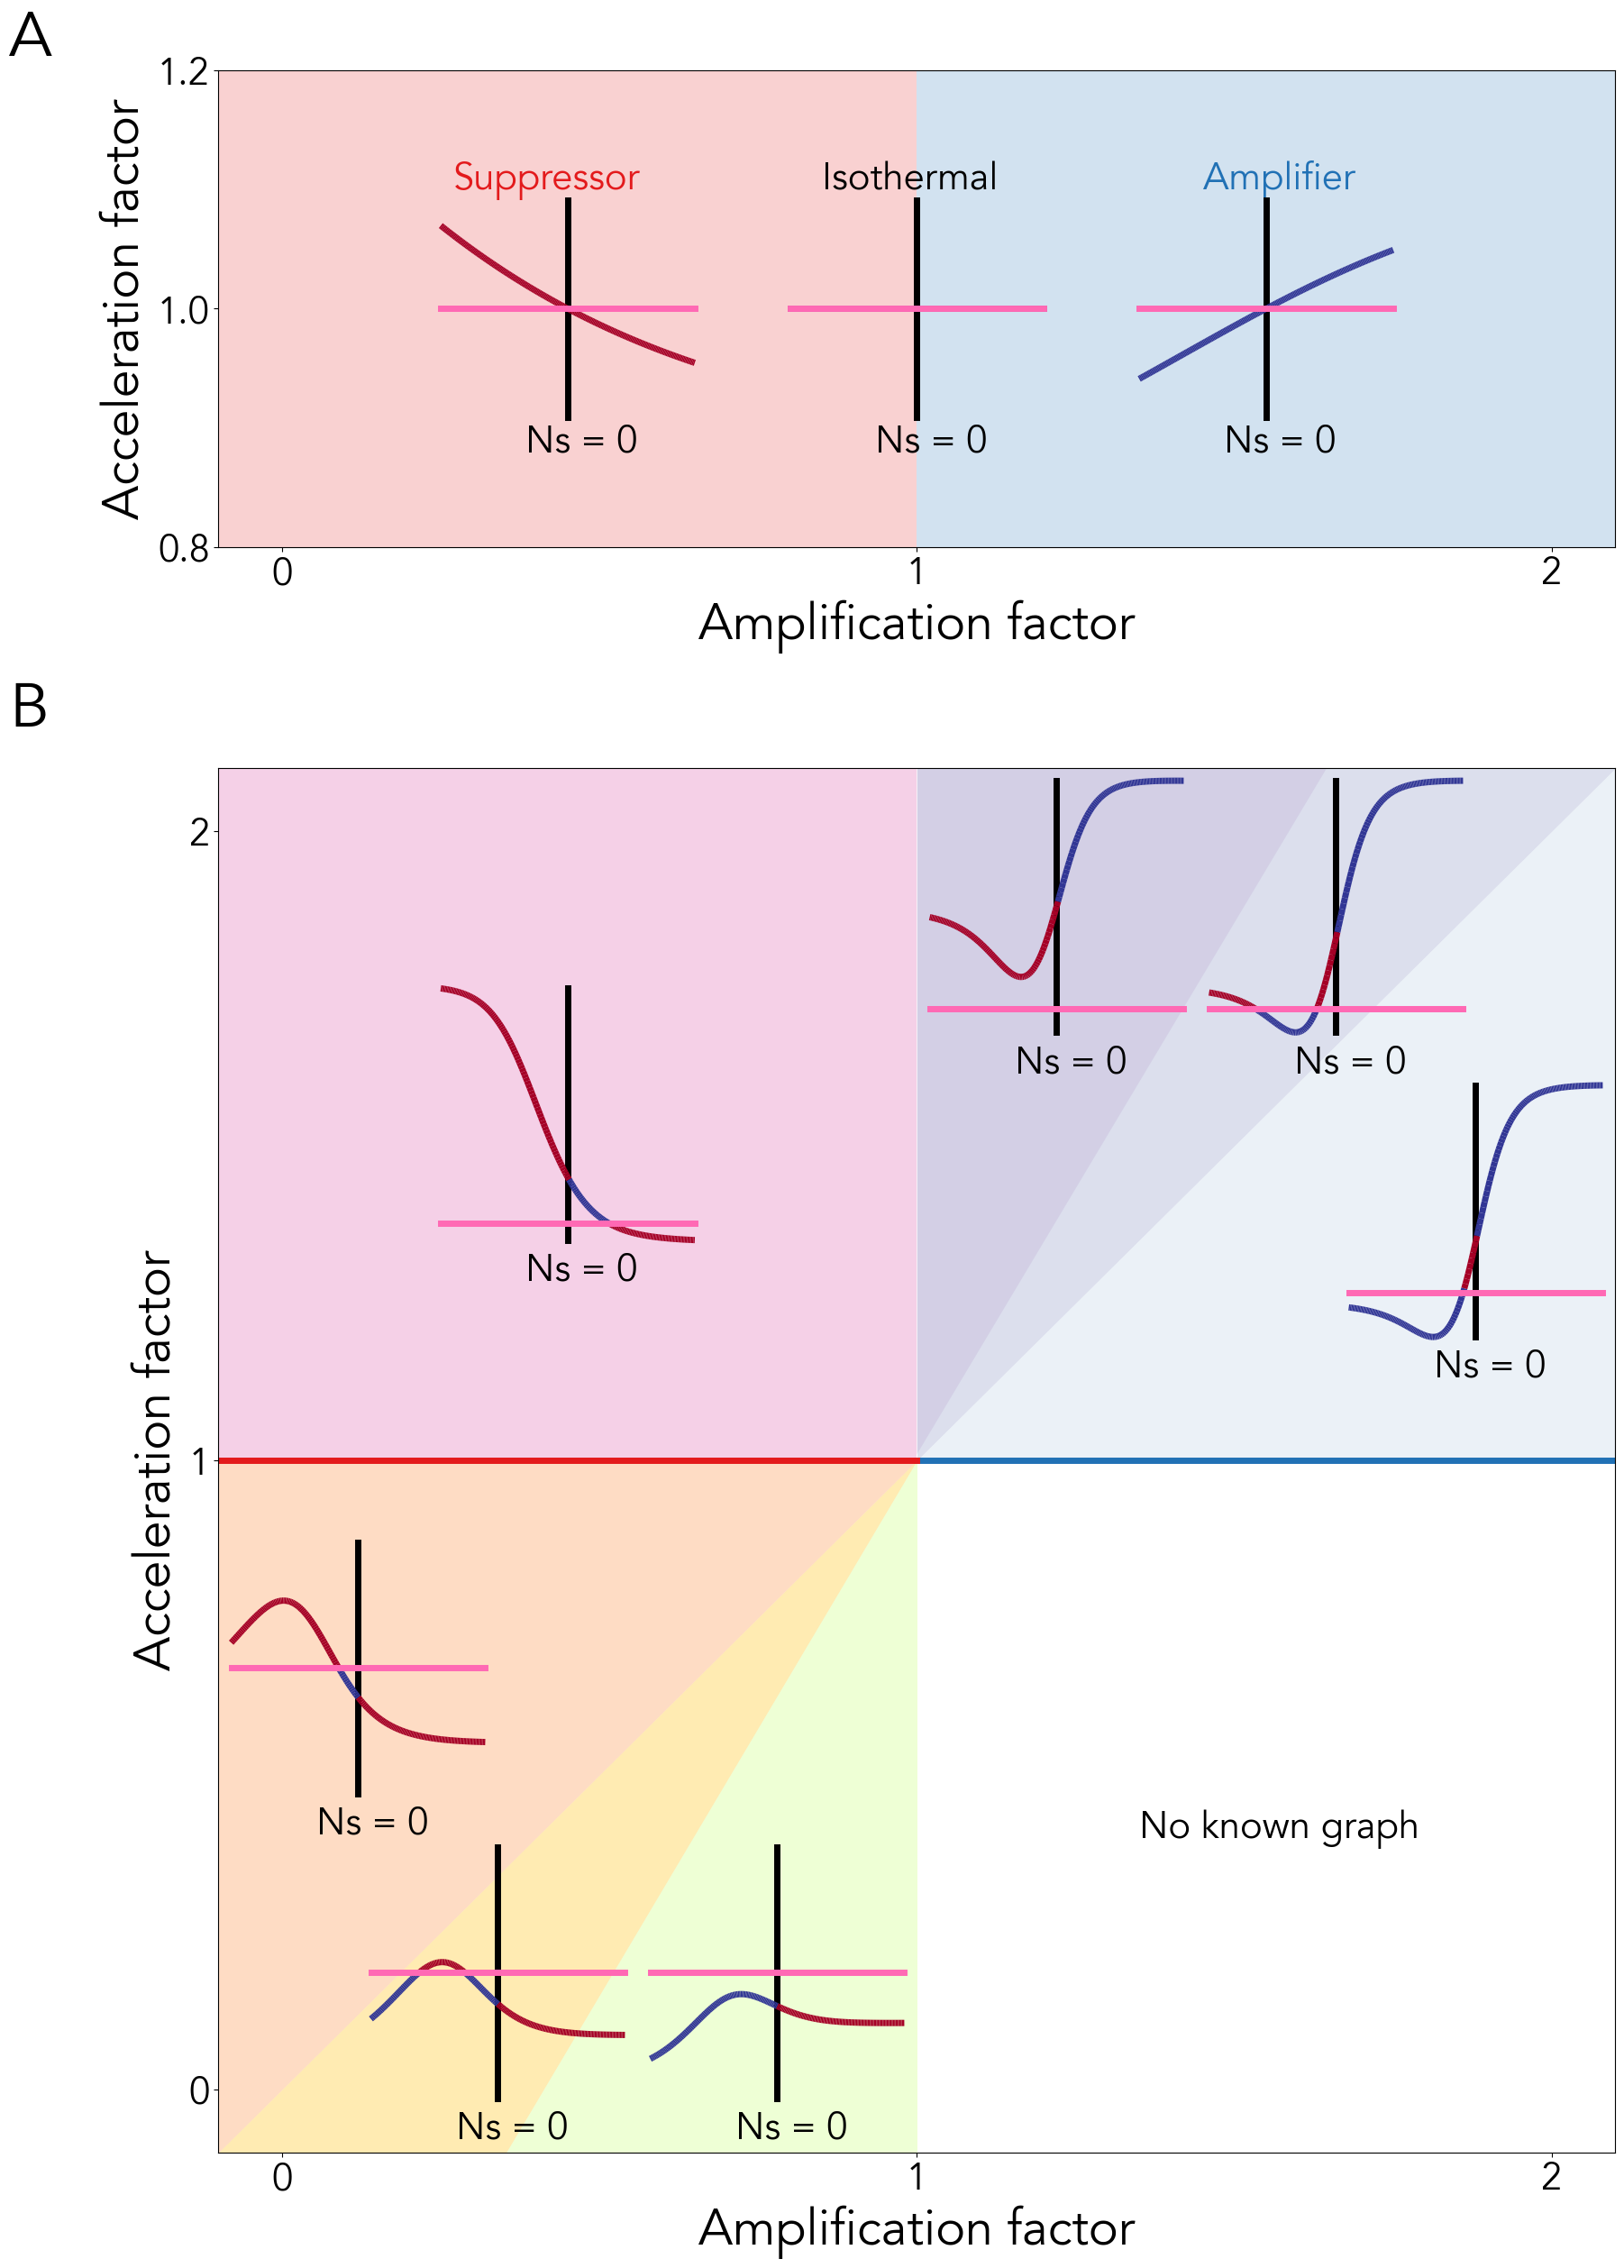

In [4]:
c = ['#c6dbef', '#6baed6', '#4292c6', '#08519c']
sns.set_palette(c[::-1])


plt.figure(figsize = (20,30))

ax = plt.subplot2grid((30,20), (0, 0), rowspan= 7, colspan = 20)
####################################################################
plt.text(1.45, 1.1,'Amplifier', fontsize = 30, c = '#2171b5')
plt.fill_between([0.999,2.1], [.7,.7], [1.3,1.3], alpha = 0.2,
                 linewidth=0.0, color = '#2171b5')

ins = ax.inset_axes([0.65,0.25,0.2,0.5])
s = np.linspace(-0.01,0.01, 200)

y = single(s, N = 100, amp = 1.5)
z = single(s, N = 100, amp = 1)

ins.plot([0,0],[0.6, 1.4], 'k', linewidth = 5)
#ins.plot(1000 * s, y / z, linewidth = 3)
color_line(1000 * s, y / z, (y - z) * (s) > 0, ins)
ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

#ins.plot(1000 * s, y1 / z, color = '#edf8b1')
ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')


####################################################################
plt.text(0.27, 1.1,'Suppressor', fontsize = 30, c = '#e31a1c')
plt.fill_between([-0.1,0.999], [.7,.7], [1.3,1.3], alpha = 0.2,
                 linewidth=0.0, color = '#e31a1c')

ins = ax.inset_axes([0.15,0.25,0.2,0.5])
s = np.linspace(-0.01,0.01, 200)

y = single(s, N = 100, amp = 0.75)
z = single(s, N = 100, amp = 1)

ins.plot([0,0],[0.8, 1.2], 'k', linewidth = 5)
#ins.plot(1000 * s, y / z, linewidth = 3, c = 'r')
color_line(1000 * s, y / z, (y - z) * (s) > 0, ins)
ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

#ins.plot(1000 * s, y1 / z, color = '#edf8b1')
ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')


####################################################################
plt.text(0.85, 1.1,'Isothermal', fontsize = 30, c = 'k')

ins = ax.inset_axes([0.4,0.25,0.2,0.5])
s = np.linspace(-0.01,0.01, 200)

y = single(s, N = 100, amp = 1)
z = single(s, N = 100, amp = 1)

ins.plot([0,0],[0, 2], 'k', linewidth = 5)
ins.plot(1000 * s, y / z, linewidth = 5)

ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

#ins.plot(1000 * s, y1 / z, color = '#edf8b1')
ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')
####################################################################

plt.xticks([0,1,2],fontsize = 30)
plt.yticks([0.8,1,1.2],fontsize = 30)

plt.xlabel('Amplification factor', fontsize = 40)
plt.ylabel('Acceleration factor', fontsize = 40)

plt.xlim(-0.1,2.1)
plt.ylim(0.8,1.2)
plt.text(-0.15, 1.03, 'A', fontsize = 50, transform=ax.transAxes)

####################################################################
####################################################################

ax = plt.subplot2grid((30,20), (10, 0), rowspan= 20, colspan = 20)

plt.plot([1,2.1],[1,1], c = '#2171b5', linewidth = 5)
plt.plot([-0.1,1],[1,1], c = '#e31a1c', linewidth = 5)


####################################################################
plt.fill_between([0.999,2.1], [1.01, 1 + 1.1 * 1.7], [2.1,2.1], alpha = 0.3,
                 linewidth=0.0, color = '#d4b9da')
ins = ax.inset_axes([0.5,0.8,0.2,0.2])
s = np.linspace(-0.01,0.01, 201)
y = np.array([approximate(s = s, mu = 1e-6, amp = 2, lamb = 1 / 3, N = 1000) for s in s])
z = np.array([approximate(s = s, mu = 1e-6, N = 1000) for s in s])

ins.plot([0,0],[0.9, max(y/z)], 'k', linewidth = 5)
color_line(1000 * s, y / z, (y - z) * (s) > 0, ins)
ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')

####################################################################
plt.fill_between([1,2.1], [1,2.1], [2.1,2.1], alpha = 0.3, 
                 linewidth=0.0, color = '#8c96c6')
ins = ax.inset_axes([0.7,0.8,0.2,0.2])
s = np.linspace(-0.01,0.01, 201)
y = np.array([approximate(s = s, mu = 1e-6, amp = 2, lamb = 1 / 2.3, N = 1000) for s in s])
z = np.array([approximate(s = s, mu = 1e-6, N = 1000) for s in s])

ins.plot([0,0],[0.9, max(y/z)], 'k', linewidth = 5)
color_line(1000 * s, y / z, (y - z) * (s) > 0, ins)
ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')

####################################################################
plt.fill_between([1,2.1], [1, 1], [1,2.1], alpha = 0.3, 
                 linewidth=0.0, color = '#bfd3e6')
ins = ax.inset_axes([0.8,0.58,0.2,0.2])
s = np.linspace(-0.01,0.01, 201)
y = np.array([approximate(s = s, mu = 1e-6, amp = 2, lamb = 1 / 2, N = 1000) for s in s])
z = np.array([approximate(s = s, mu = 1e-6, N = 1000) for s in s])

ins.plot([0,0],[min(y/z), max(y/z)], 'k', linewidth = 5)
color_line(1000 * s, y / z, (y - z) * (s) > 0, ins)
ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')

####################################################################
plt.text(1.35, 0.4,'No known graph', fontsize = 30)
plt.fill_between([1,2.1], [-0.1,-0.1], [1,1], alpha = 0.3, 
                 linewidth=0.0, color = 'w')

####################################################################
plt.fill_between([-0.1,1], [1,1], [2.1,2.1], alpha = 0.3, 
                 linewidth=0.0, color = '#df65b0')
ins = ax.inset_axes([0.15,0.65,0.2,0.2])
s = np.linspace(-0.01,0.01, 201)
y = np.array([approximate(s = s, mu = 1e-6, amp = 0.9, lamb = 1 / 2, N = 1000) for s in s])
z = np.array([approximate(s = s, mu = 1e-6, N = 1000) for s in s])

ins.plot([0,0],[min(y/z), max(y/z)], 'k', linewidth = 5)
color_line(1000 * s, y / z, (y - z) * (s) > 0, ins)
ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')
####################################################################
plt.fill_between([-0.1,1], [-0.1,1], [1,1], alpha = 0.3, 
                 linewidth=0.0, color = '#fd8d3c')
ins = ax.inset_axes([0.,0.25,0.2,0.2])
s = np.linspace(-0.01,0.01, 201)
y = np.array([approximate(s = s, mu = 1e-6, amp = 0.4, lamb = 1 / 0.2, N = 1000) for s in s])
z = np.array([approximate(s = s, mu = 1e-6, N = 1000) for s in s])

ins.plot([0,0],[0, 2], 'k', linewidth = 5)
color_line(1000 * s, y / z, (y - z) * (s) > 0, ins)
ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')

####################################################################
plt.fill_between([-0.1,1], [-0.1,1],[1 - 1.1 * 1.7,1], alpha = 0.3, 
                 linewidth=0.0, color = '#FFBF00')

ins = ax.inset_axes([0.1, 0.03,0.2,0.2])
s = np.linspace(-0.01,0.01, 201)
y = np.array([approximate(s = s, mu = 1e-6, amp = 0.5, lamb = 1 / 0.15, N = 1000) for s in s])
z = np.array([approximate(s = s, mu = 1e-6, N = 1000) for s in s])

ins.plot([0,0],[0, 2], 'k', linewidth = 5)
color_line(1000 * s, y / z, (y - z) * (s) > 0, ins)
ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')

####################################################################
#plt.text(0.45, -0.07,'Amplifier to Suppressor', fontsize = 30)
plt.fill_between([-0.1,1], [-0.1,-0.1], [1 - 1.1 * 1.7,1], alpha = 0.2, 
                 linewidth=0.0, color = '#ADFF2F')

ins = ax.inset_axes([0.3, 0.03,0.2,0.2])
s = np.linspace(-0.01,0.01, 201)
y = np.array([approximate(s = s, mu = 1e-6, amp = 0.6, lamb = 1 / 0.1, N = 1000) for s in s])
z = np.array([approximate(s = s, mu = 1e-6, N = 1000) for s in s])

ins.plot([0,0],[0, 2], 'k', linewidth = 5)
color_line(1000 * s, y / z, (y - z) * (s) > 0, ins)
ins.plot([-10,10],[1,1], '#ff69b4', linewidth = 5)

ins.text(0.35,-0.1,'Ns = 0', fontsize = 30, transform = ins.transAxes)
ins.patch.set_alpha(0)
ins.axis('off')

####################################################################
plt.xticks([0,1,2],fontsize = 30)
plt.yticks([0,1,2],fontsize = 30)

plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.xlabel('Amplification factor', fontsize = 40)
plt.ylabel('Acceleration factor', fontsize = 40)

plt.text(-0.15, 1.03, 'B', fontsize = 50, transform=ax.transAxes)

plt.tight_layout()
plt.show()

In [14]:
# Figure 5